<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Insurance Customer Lifetime Value</h1>
</div>

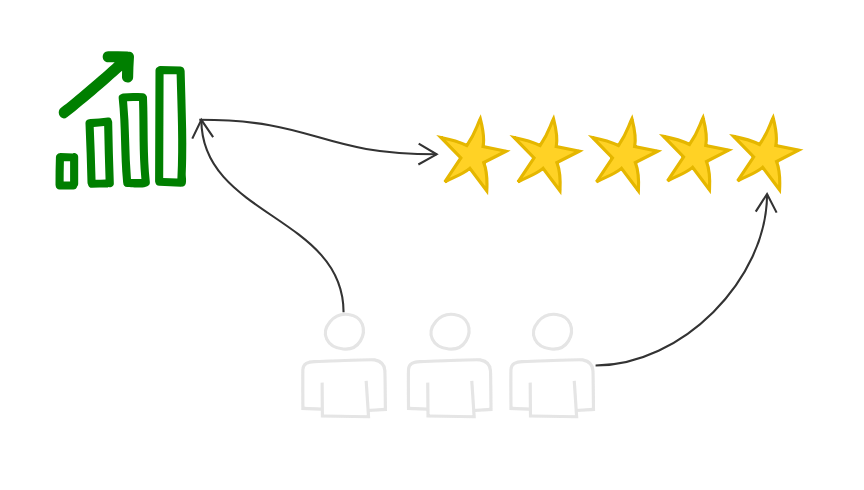

Author:- Aniket B. Barphe
    
LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
        
Platform:- Analytics Vidhya (JOB-A-THON - January 2023)
    
Problem Statement:- Build a machine learning-based approach to predict the Insurance Customer Lifetime Value

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [145]:
# Data manipulation
from sklearn.preprocessing import LabelEncoder
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import catboost as cb
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

# Model Evaluations
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

# User Defined Functions

# a) BoxPlot:- To check Outliers
def Create_BoxPlotS(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, Feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.boxplot(DataFrame[Feature],ax=ax)   
    fig.tight_layout()  
    plt.show()
    
# b) DistPlot:- To check Normality
def Create_DistPlots(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.distplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()

# c) Univariate Analysis of Catagorical Variables
def Univariate_Cat_Features(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.countplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()
    
# d) Scatter Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_ScatterPlots(DataFrame, Features, Target_Variable, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.scatterplot(DataFrame[feature],DataFrame[Target_Variable],ax=ax)  
    fig.tight_layout()  
    plt.show()

# e) Joint Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_JointPlots(DataFrame, Features, Target_Variable):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        sns.jointplot(y= Target_Variable, x= DataFrame[feature], data = DataFrame,kind='reg')
    fig.tight_layout()  
    plt.show()

# f) Check Feature wise Outliers   
def Check_Outliers(DataFrame, Column_List):
    for column in Column_List:    
        q1 = DataFrame[column].quantile(0.25)    # First Quartile
        q3 = DataFrame[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                    # Lower Limit
        ulimit = q3 + 1.5*IQR                    # Upper Limit
        outliers = DataFrame[(DataFrame[column] < llimit) | (DataFrame[column] > ulimit)]
        print('\nNumber of outliers in "' + column + '" :' + str(len(outliers)))
        print('\nLower Limit in "' + column + '" :',llimit)
        print('\nUpper Limit in "' + column + '" :',ulimit)
        print('\nInter Quartile Range of "' + column + '" :',IQR,"\n")

# g) Label Encoding   
def Label_Encoder(DataFrame):
    le = LabelEncoder()
    for col in DataFrame.columns:
        if(DataFrame[col].dtype == 'object'):
            DataFrame.loc[:,col] = le.fit_transform(DataFrame.loc[:,col])

CatBoost version 1.1
NumPy version 1.21.5
Pandas version 1.4.2
seaborn version 0.11.2
sklearn version 1.0.1
xgboost version 1.6.2
lightgbm version 3.3.0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [146]:
train = pd.read_csv (r'C:\Users\PC\Pictures\AV\JTHON-JAN23\train_BRCpofr.csv')
test = pd.read_csv (r'C:\Users\PC\Pictures\AV\JTHON-JAN23\test_koRSKBP.csv')
submission = pd.read_csv (r'C:\Users\PC\Pictures\AV\JTHON-JAN23\sample_submission.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 
- Check Unique Entries in Train Dataset 
- Check Unique Entries in Test Dataset

In [147]:

print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB
None 

Shape of Train Data:-

(89392, 12) 

---------------------------------------------------------------------------------------------------------------------

Data Types in Test Data:-

<class 

In [148]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)

About Train Data:-

   id  gender   area qualification         income  marital_status  vintage  \
0  1   Male    Urban  Bachelor      5L-10L         1               5         
1  2   Male    Rural  High School   5L-10L         0               8         
2  3   Male    Urban  Bachelor      5L-10L         1               8         
3  4   Female  Rural  High School   5L-10L         0               7         
4  5   Male    Urban  High School   More than 10L  1               6         

   claim_amount num_policies policy type_of_policy    cltv  
0  5790          More than 1  A      Platinum       64308   
1  5080          More than 1  A      Platinum       515400  
2  2599          More than 1  A      Platinum       64212   
3  0             More than 1  A      Platinum       97920   
4  3508          More than 1  A      Gold           59736    

---------------------------------------------------------------------------------------------------------------------

About Test Data:-

     

In [149]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About Train Data:-

          id  gender   area qualification         income  marital_status  \
89387  89388  Male    Rural  High School   More than 10L  0                
89388  89389  Male    Urban  Bachelor      5L-10L         1                
89389  89390  Female  Urban  Bachelor      5L-10L         0                
89390  89391  Female  Rural  High School   2L-5L          0                
89391  89392  Female  Rural  High School   5L-10L         0                

       vintage  claim_amount num_policies policy type_of_policy    cltv  
89387  6        0             More than 1  B      Platinum       95736   
89388  0        3897          More than 1  A      Platinum       67596   
89389  4        3363          More than 1  B      Platinum       114120  
89390  8        0             More than 1  B      Platinum       71772   
89391  6        0             More than 1  B      Gold           108144   

-----------------------------------------------------------------------------

In [150]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,89392.000000,89392,89392,89392,89392,89392.000000,89392.000000,89392.000000,89392,89392,89392,89392.000000
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3,NaN
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum,NaN
freq,NaN,50497,62455,46247,52716,NaN,NaN,NaN,60263,56644,47796,NaN
mean,44696.500000,NaN,NaN,NaN,NaN,0.575488,4.595669,4351.502416,NaN,NaN,NaN,97952.828978
std,25805.391969,NaN,NaN,NaN,NaN,0.494272,2.290446,3262.359775,NaN,NaN,NaN,90613.814793
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,24828.000000
25%,22348.750000,NaN,NaN,NaN,NaN,0.000000,3.000000,2406.000000,NaN,NaN,NaN,52836.000000
50%,44696.500000,NaN,NaN,NaN,NaN,1.000000,5.000000,4089.000000,NaN,NaN,NaN,66396.000000
75%,67044.250000,NaN,NaN,NaN,NaN,1.000000,6.000000,6094.000000,NaN,NaN,NaN,103440.000000


In [151]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
count,59595.000000,59595,59595,59595,59595,59595.000000,59595.000000,59595.000000,59595,59595,59595
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum
freq,NaN,33641,41441,30835,35088,NaN,NaN,NaN,40308,37871,31908
mean,119190.000000,NaN,NaN,NaN,NaN,0.576928,4.620304,4368.504321,NaN,NaN,NaN
std,17203.738983,NaN,NaN,NaN,NaN,0.494051,2.282511,3288.132408,NaN,NaN,NaN
min,89393.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,104291.500000,NaN,NaN,NaN,NaN,0.000000,3.000000,2398.000000,NaN,NaN,NaN
50%,119190.000000,NaN,NaN,NaN,NaN,1.000000,5.000000,4106.000000,NaN,NaN,NaN
75%,134088.500000,NaN,NaN,NaN,NaN,1.000000,6.000000,6104.000000,NaN,NaN,NaN


In [152]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
id,0,0.0
gender,0,0.0
area,0,0.0
qualification,0,0.0
income,0,0.0
marital_status,0,0.0
vintage,0,0.0
claim_amount,0,0.0
num_policies,0,0.0
policy,0,0.0


In [153]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
id,0,0.0
gender,0,0.0
area,0,0.0
qualification,0,0.0
income,0,0.0
marital_status,0,0.0
vintage,0,0.0
claim_amount,0,0.0
num_policies,0,0.0
policy,0,0.0


In [154]:
# Checking Unique entries in Train Data
listItem = []
for col in train.columns :
    listItem.append( [col, train[col].nunique(), train[col].unique()])

train_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Train Data are :-\n\n")
print('-------------'*9)
train_unique

Unique entries in Train Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,id,89392,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,gender,2,"[Male, Female]"
2,area,2,"[Urban, Rural]"
3,qualification,3,"[Bachelor, High School, Others]"
4,income,4,"[5L-10L, More than 10L, 2L-5L, <=2L]"
5,marital_status,2,"[1, 0]"
6,vintage,9,"[5, 8, 7, 6, 1, 0, 3, 4, 2]"
7,claim_amount,10889,"[5790, 5080, 2599, 0, 3508, 5473, 6105, 4329, 6351, 4327, 4615, 6915, 5398, 4336, 7541, 8029, 6132, 2212, 2933, 3548, 3166, 8145, 5779, 4834, 2854, 2438, 3914, 2634, 6473, 5573, 2806, 2708, 6279, 4050, 5443, 4190, 16123, 6458, 7890, 9583, 4080, 3988, 3170, 2845, 4262, 10108, 5124, 4384, 2852, 5976, 6526, 3203, 3335, 3566, 7317, 6111, 2280, 11583, 2669, 2692, 11021, 3207, 5144, 4180, 6013, 3628, 5403, 6259, 3088, 6383, 2065, 7239, 6494, 7231, 3563, 6445, 4234, 5792, 5102, 3937, 2398, 9840, 4861, 15703, 8869, 3922, 3011, 4083, 6512, 2696, 5793, 5504, 3714, 6270, 3243, 6406, 7451, 2281, 3412, 5297, ...]"
8,num_policies,2,"[More than 1, 1]"
9,policy,3,"[A, C, B]"


In [155]:
# Checking Unique entries in Test Data
listItem = []
for col in test.columns :
    listItem.append( [col, test[col].nunique(), test[col].unique()])

test_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Test Data are :-\n\n")
print('-------------'*9)
test_unique

Unique entries in Test Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,id,59595,"[89393, 89394, 89395, 89396, 89397, 89398, 89399, 89400, 89401, 89402, 89403, 89404, 89405, 89406, 89407, 89408, 89409, 89410, 89411, 89412, 89413, 89414, 89415, 89416, 89417, 89418, 89419, 89420, 89421, 89422, 89423, 89424, 89425, 89426, 89427, 89428, 89429, 89430, 89431, 89432, 89433, 89434, 89435, 89436, 89437, 89438, 89439, 89440, 89441, 89442, 89443, 89444, 89445, 89446, 89447, 89448, 89449, 89450, 89451, 89452, 89453, 89454, 89455, 89456, 89457, 89458, 89459, 89460, 89461, 89462, 89463, 89464, 89465, 89466, 89467, 89468, 89469, 89470, 89471, 89472, 89473, 89474, 89475, 89476, 89477, 89478, 89479, 89480, 89481, 89482, 89483, 89484, 89485, 89486, 89487, 89488, 89489, 89490, 89491, 89492, ...]"
1,gender,2,"[Female, Male]"
2,area,2,"[Rural, Urban]"
3,qualification,3,"[High School, Bachelor, Others]"
4,income,4,"[5L-10L, 2L-5L, More than 10L, <=2L]"
5,marital_status,2,"[0, 1]"
6,vintage,9,"[6, 4, 7, 2, 5, 3, 8, 1, 0]"
7,claim_amount,9839,"[2134, 4102, 2925, 0, 14059, 3697, 5581, 7008, 2888, 5555, 3891, 4709, 7743, 5958, 6893, 3230, 4586, 9391, 3183, 5792, 4083, 7441, 2408, 6705, 7502, 6809, 10174, 5875, 6072, 3922, 2580, 3608, 5890, 5240, 5381, 2626, 4592, 2865, 3337, 6577, 3442, 6193, 6945, 8057, 5387, 15190, 2763, 3930, 7108, 7740, 5643, 4987, 6007, 5610, 8847, 3551, 5225, 3119, 7714, 2489, 6003, 2557, 4214, 7900, 6130, 2761, 4525, 3063, 9918, 4215, 4666, 4145, 3304, 10538, 5971, 7518, 3995, 2988, 4232, 4622, 2215, 3601, 5806, 2577, 2185, 2834, 2091, 5662, 5961, 2228, 5733, 3405, 4142, 4689, 6736, 8233, 8910, 3378, 3562, 9689, ...]"
8,num_policies,2,"[More than 1, 1]"
9,policy,3,"[B, A, C]"


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


In [156]:
# Segregation of Numerical Columns from Train Data
num_cols_train = train.select_dtypes(['int64','float64']).columns
print("Numerical Columns in Train Data are :-\n\n")
print(num_cols_train)
print('-------------'*9)

# Segregation of Catagorical Columns from Train Data
cat_cols_train = train.select_dtypes(['object']).columns
print("Catagorical Columns in Train Data are :-\n\n")
print(cat_cols)
print('-------------'*9)

Numerical Columns in Train Data are :-


Index(['id', 'marital_status', 'vintage', 'claim_amount', 'cltv'], dtype='object')
---------------------------------------------------------------------------------------------------------------------
Catagorical Columns in Train Data are :-


Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy'],
      dtype='object')
---------------------------------------------------------------------------------------------------------------------


In [157]:
# Check Outliers in the Train Dataset
Check_Outliers(train,num_cols_train)


Number of outliers in "id" :0

Lower Limit in "id" : -44694.5

Upper Limit in "id" : 134087.5

Inter Quartile Range of "id" : 44695.5 


Number of outliers in "marital_status" :0

Lower Limit in "marital_status" : -1.5

Upper Limit in "marital_status" : 2.5

Inter Quartile Range of "marital_status" : 1.0 


Number of outliers in "vintage" :0

Lower Limit in "vintage" : -1.5

Upper Limit in "vintage" : 10.5

Inter Quartile Range of "vintage" : 3.0 


Number of outliers in "claim_amount" :2258

Lower Limit in "claim_amount" : -3126.0

Upper Limit in "claim_amount" : 11626.0

Inter Quartile Range of "claim_amount" : 3688.0 


Number of outliers in "cltv" :10223

Lower Limit in "cltv" : -23070.0

Upper Limit in "cltv" : 179346.0

Inter Quartile Range of "cltv" : 50604.0 



Name of Categorical Variable:- gender 

Male      50497
Female    38895
Name: gender, dtype: int64


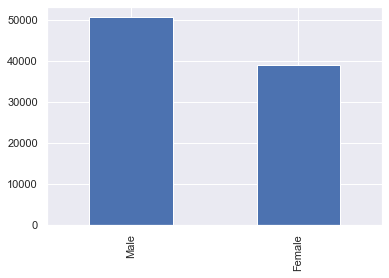

Name of Categorical Variable:- area 

Urban    62455
Rural    26937
Name: area, dtype: int64


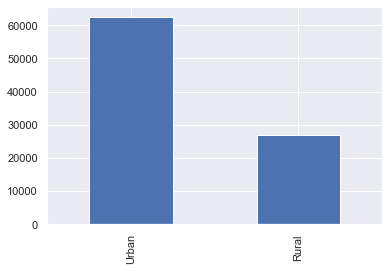

Name of Categorical Variable:- qualification 

High School    46247
Bachelor       39399
Others         3746 
Name: qualification, dtype: int64


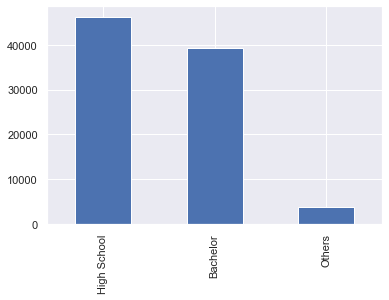

Name of Categorical Variable:- income 

5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L             1854 
Name: income, dtype: int64


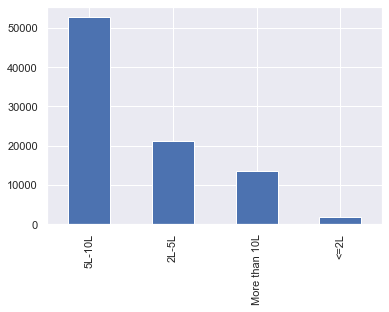

Name of Categorical Variable:- num_policies 

More than 1    60263
1              29129
Name: num_policies, dtype: int64


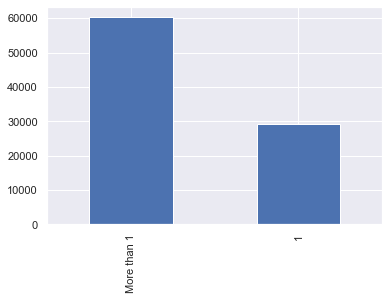

Name of Categorical Variable:- policy 

A    56644
B    24635
C    8113 
Name: policy, dtype: int64


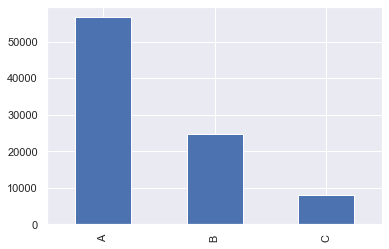

Name of Categorical Variable:- type_of_policy 

Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64


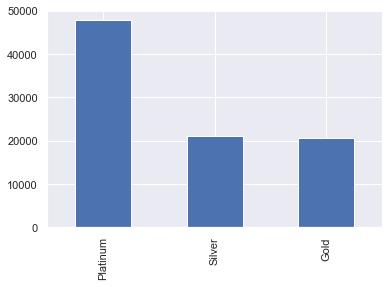

In [158]:
# Univariate Analysis of Categorical Variables in Train DataSet
for x in cat_cols_train:
    print("Name of Categorical Variable:-",x,'\n')
    print(train[x].value_counts())
    train[x].value_counts().plot.bar()
    plt.show()

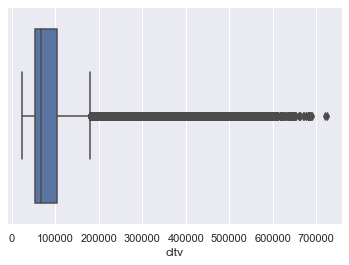

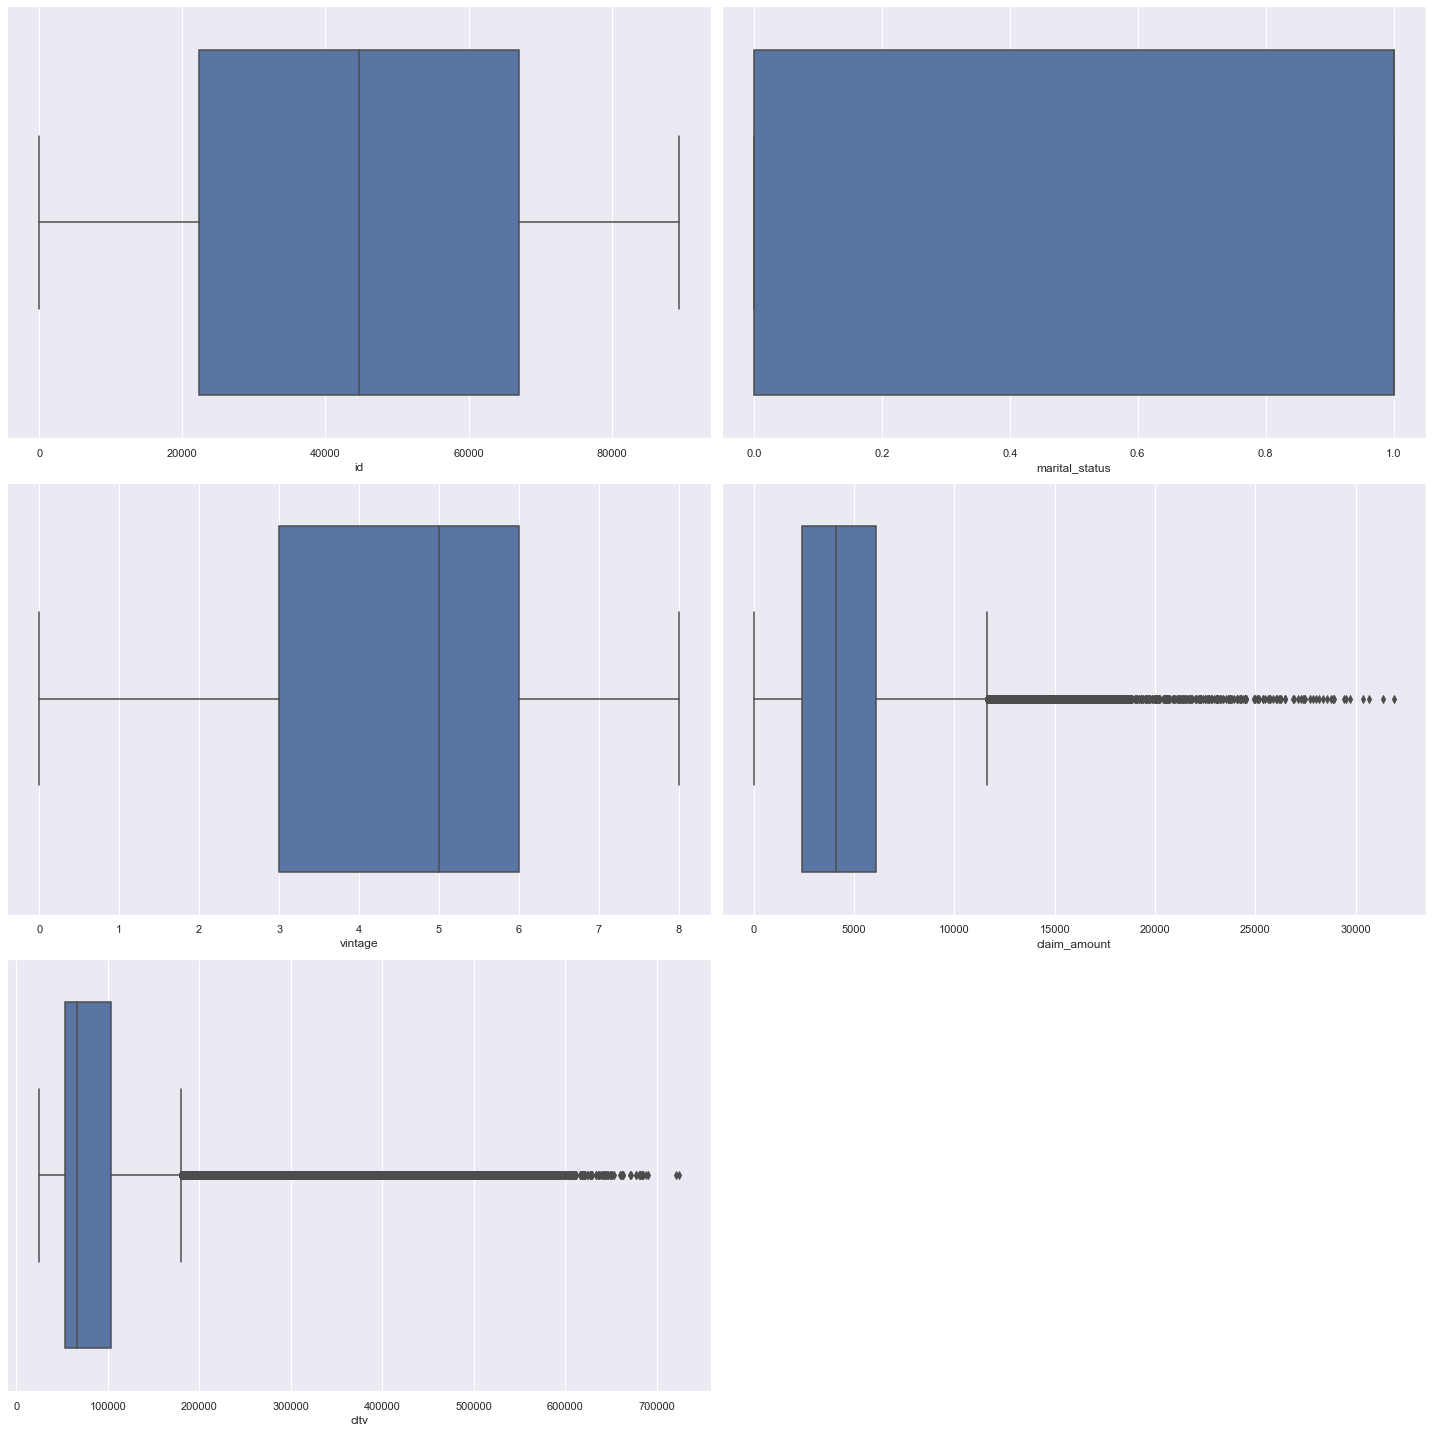

In [159]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Outliers)

# Dependent Numerical Variable
sns.boxplot(train['cltv']);

# Independent Numerical Variable
Create_BoxPlotS(train,num_cols_train,3,2)

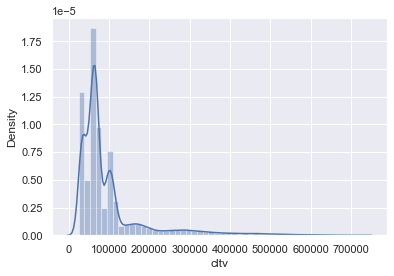

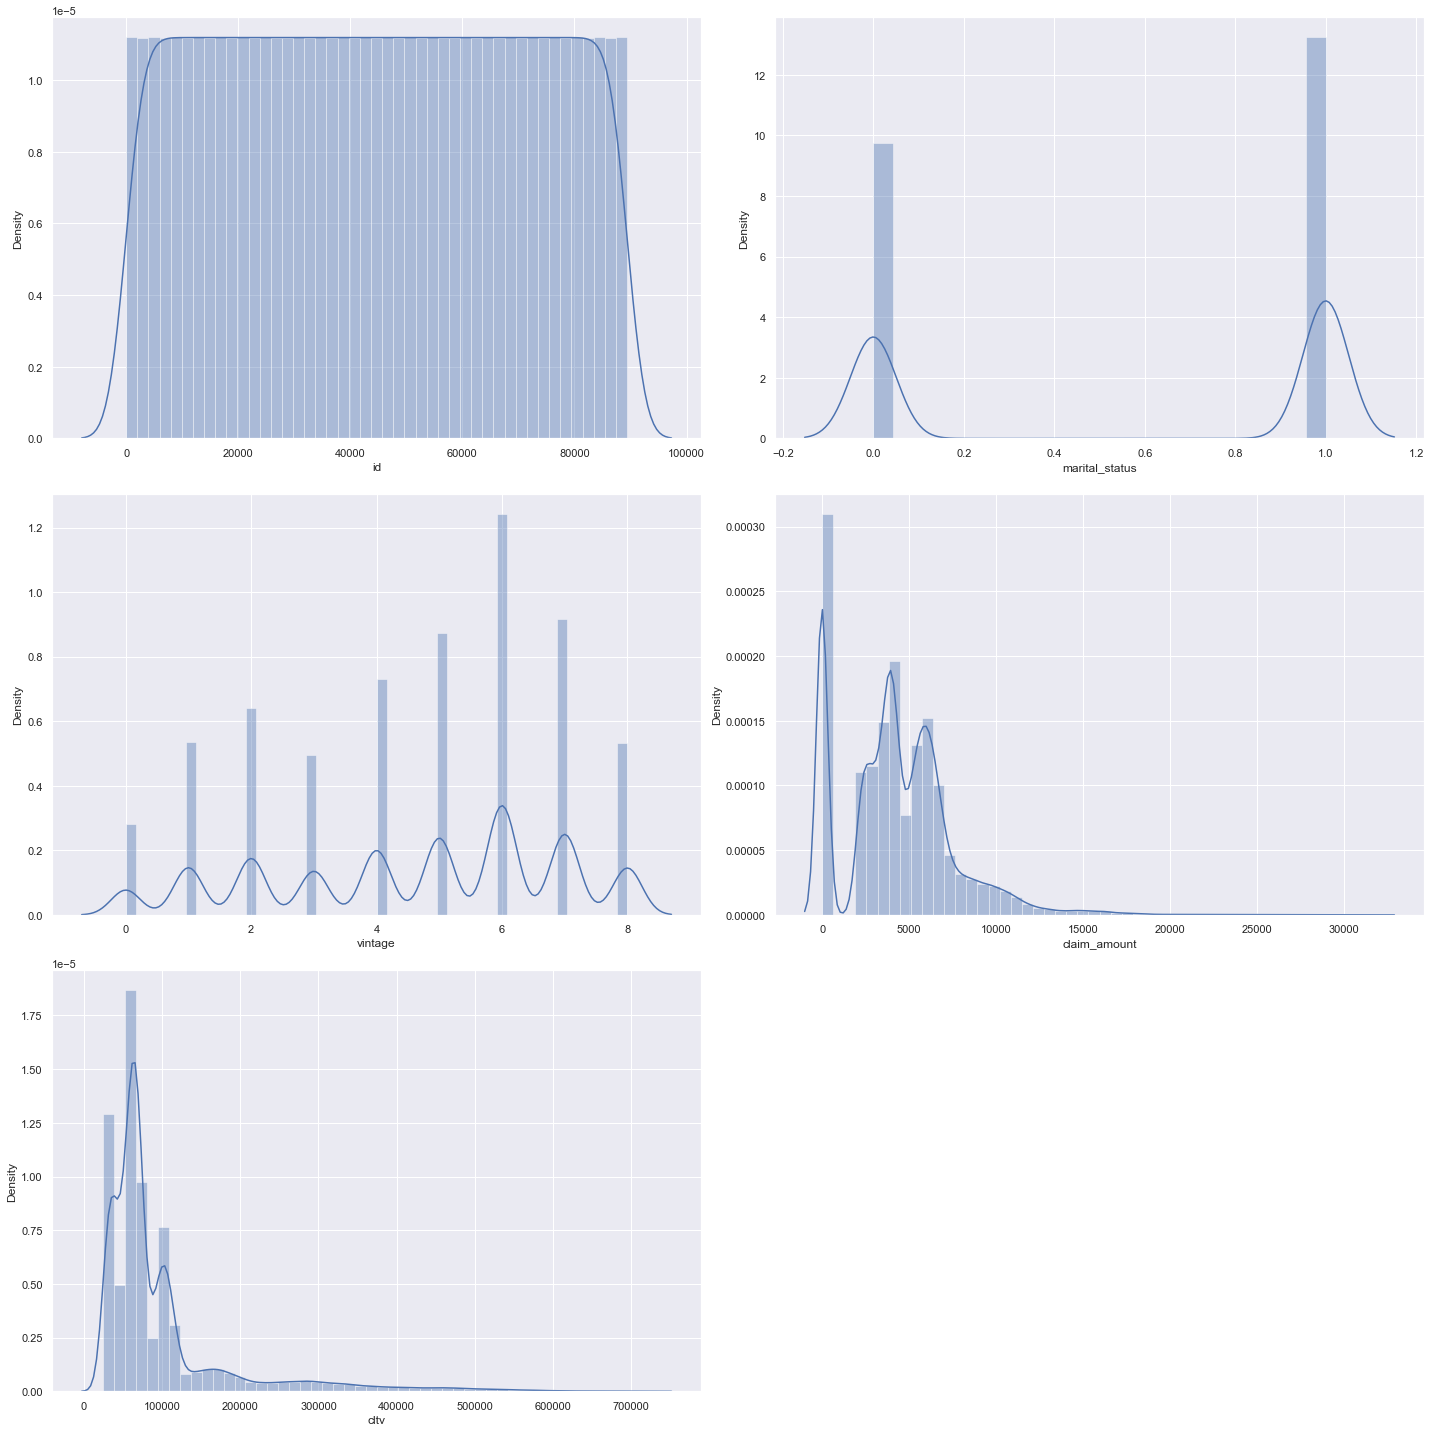

In [160]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Normality)

# Dependent Numerical Variable
sns.distplot(train['cltv']);

# Independent Numerical Variable
Create_DistPlots(train,num_cols_train,3,2)

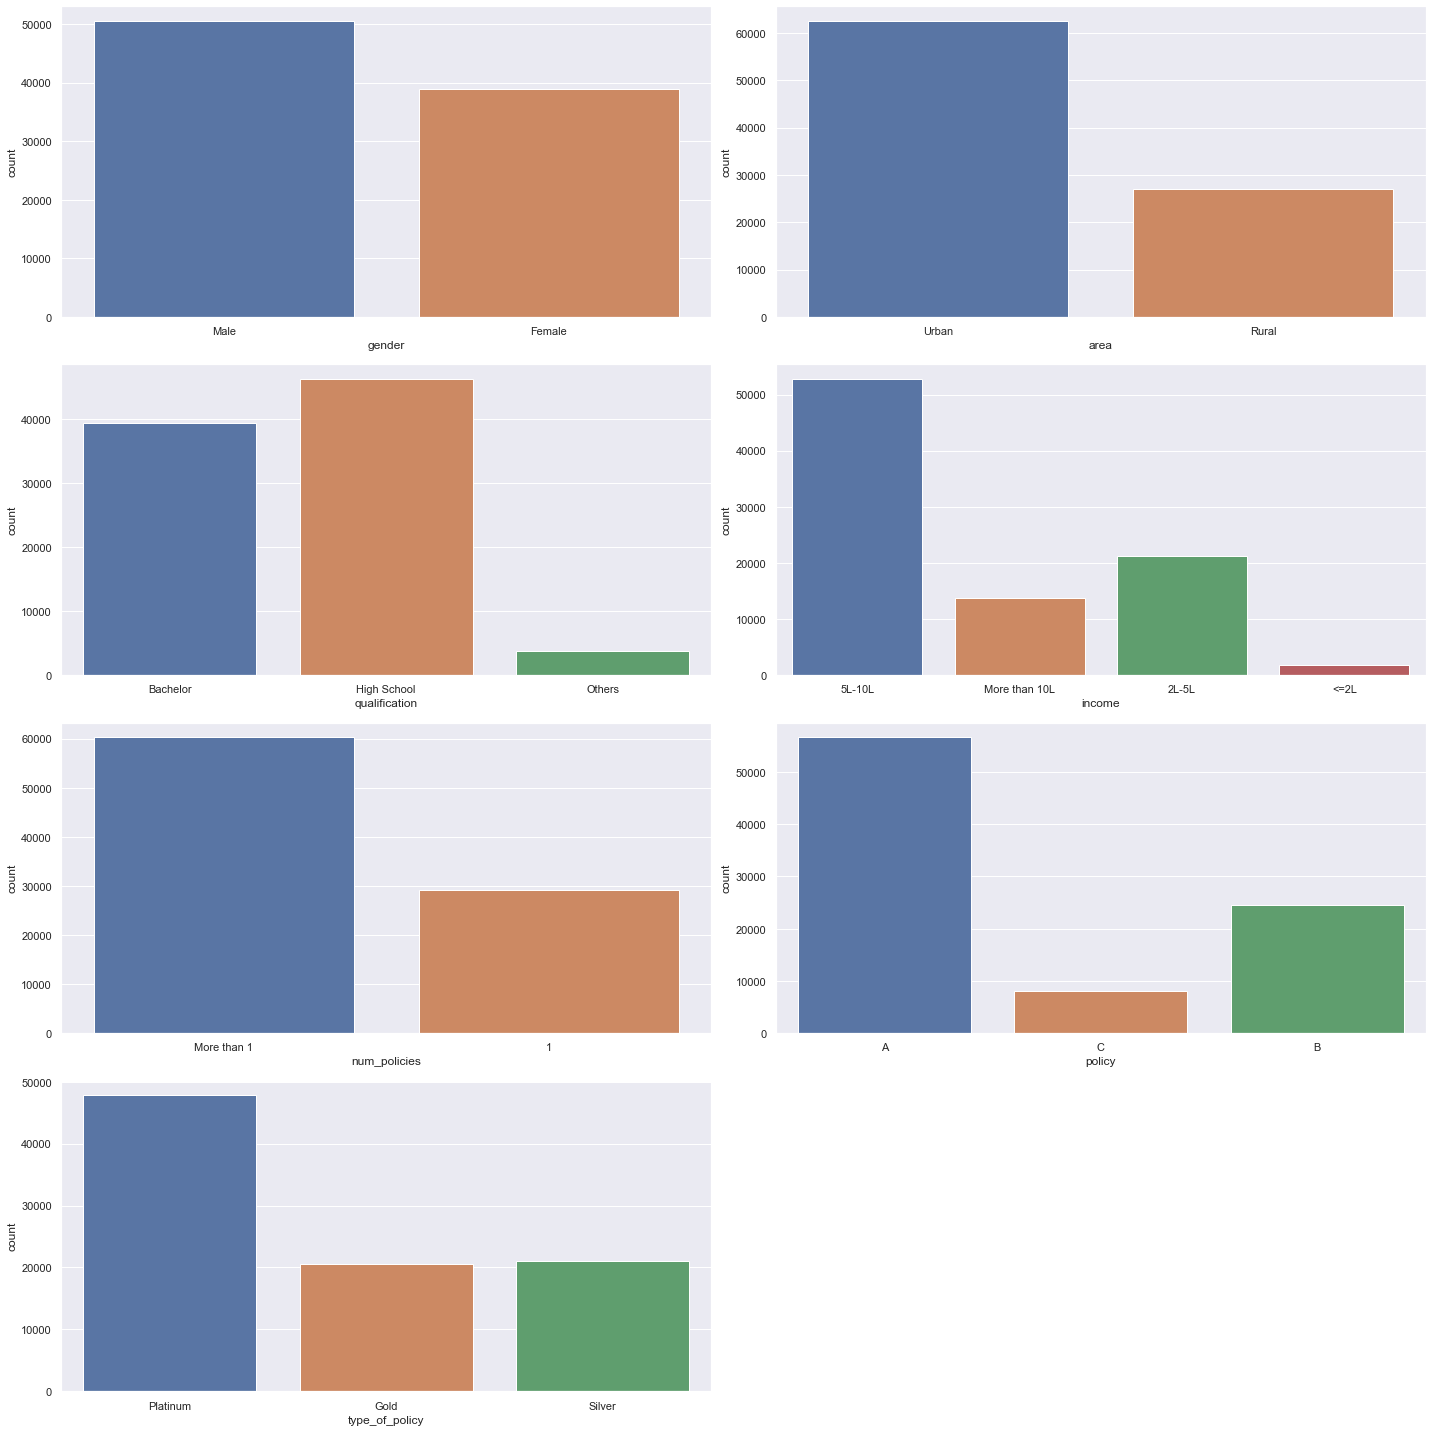

In [161]:
# Univariate Analysis of Catagorical Variables in Train Dataset
Univariate_Cat_Features(train,cat_cols_train,4,2)

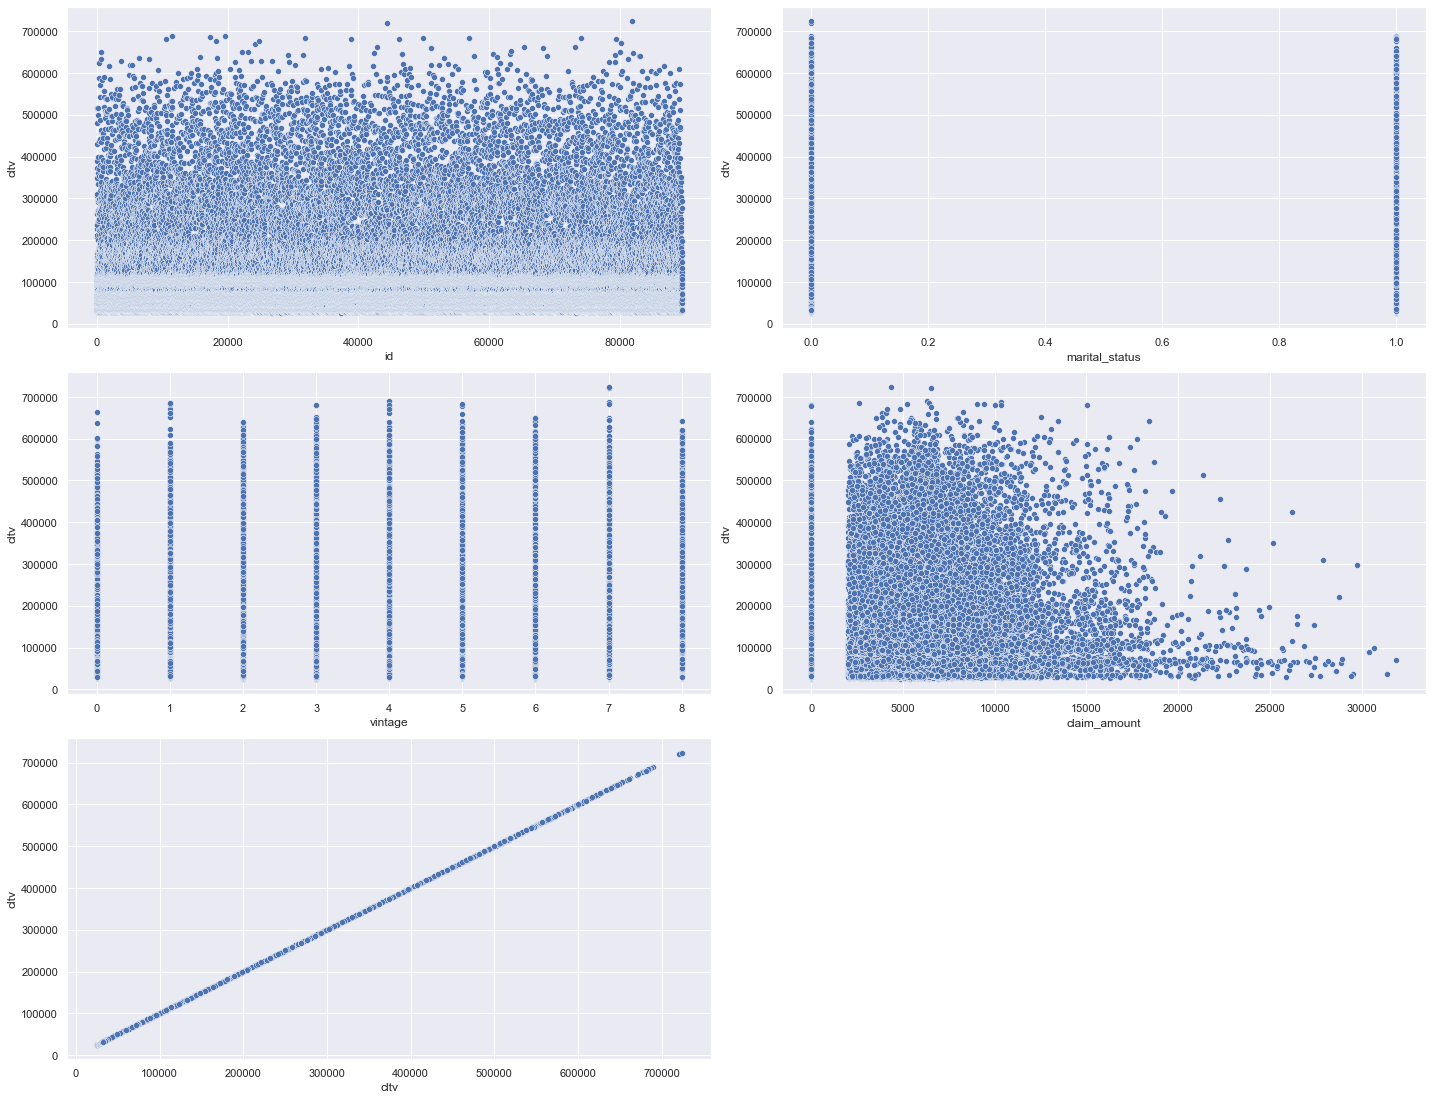

In [162]:
# Bivariate Analysis between Target Variable & Independent Variables(Numerical Variables) 
Create_ScatterPlots(train,num_cols_train,'cltv',4,2)

<Figure size 1440x1440 with 0 Axes>

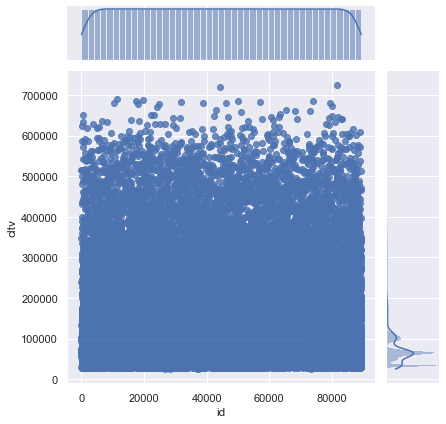

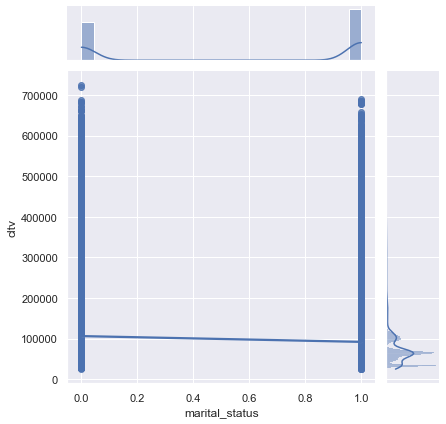

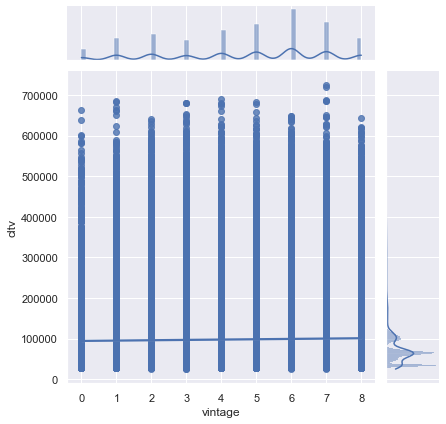

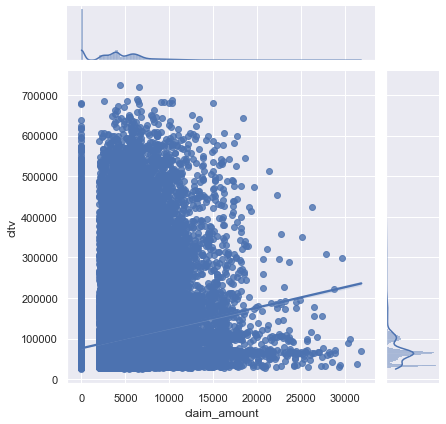

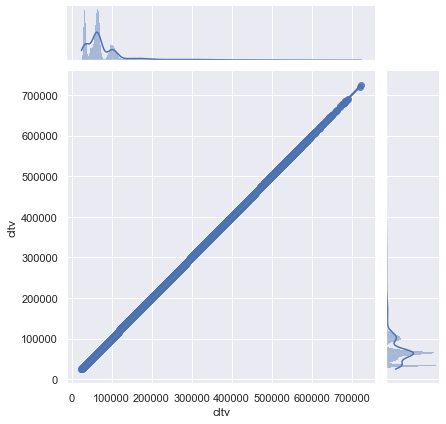

In [163]:
# Bivariate Analysis between Target Variable & Independent Variables(Numerical Variables) 
Create_JointPlots(train,num_cols_train,'cltv');

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

- Label Encoding of Train Dataset

In [164]:
Label_Encoder(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Test DataSet</h2>
</div>

- Label Encoding of Test Dataset

In [165]:
Label_Encoder(test)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Additional Data Visualization</h2>
</div>

- After Processing of "Train" Data

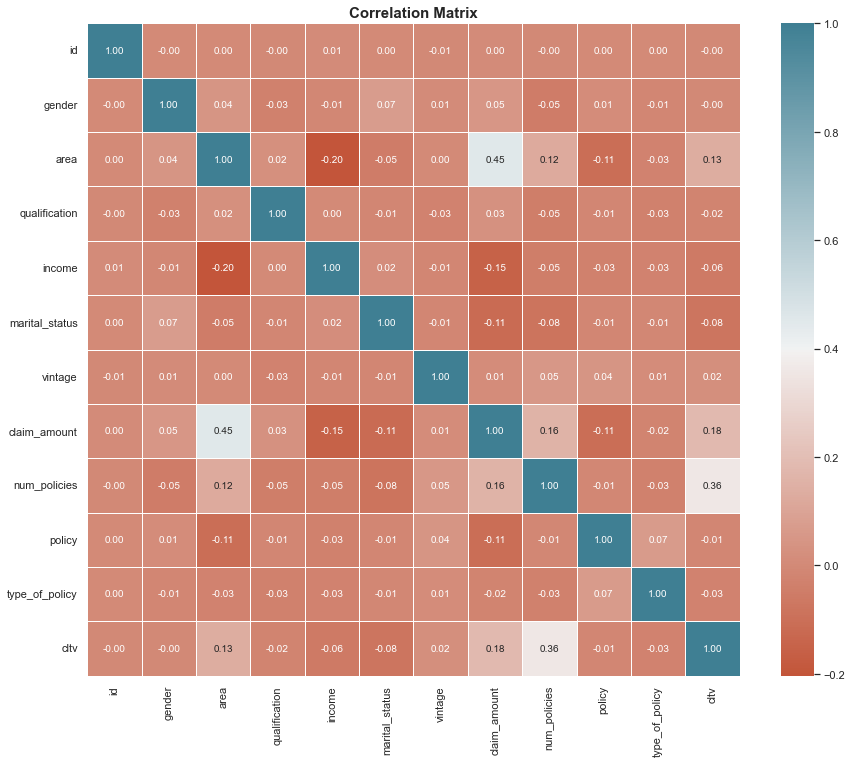

In [166]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = train.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

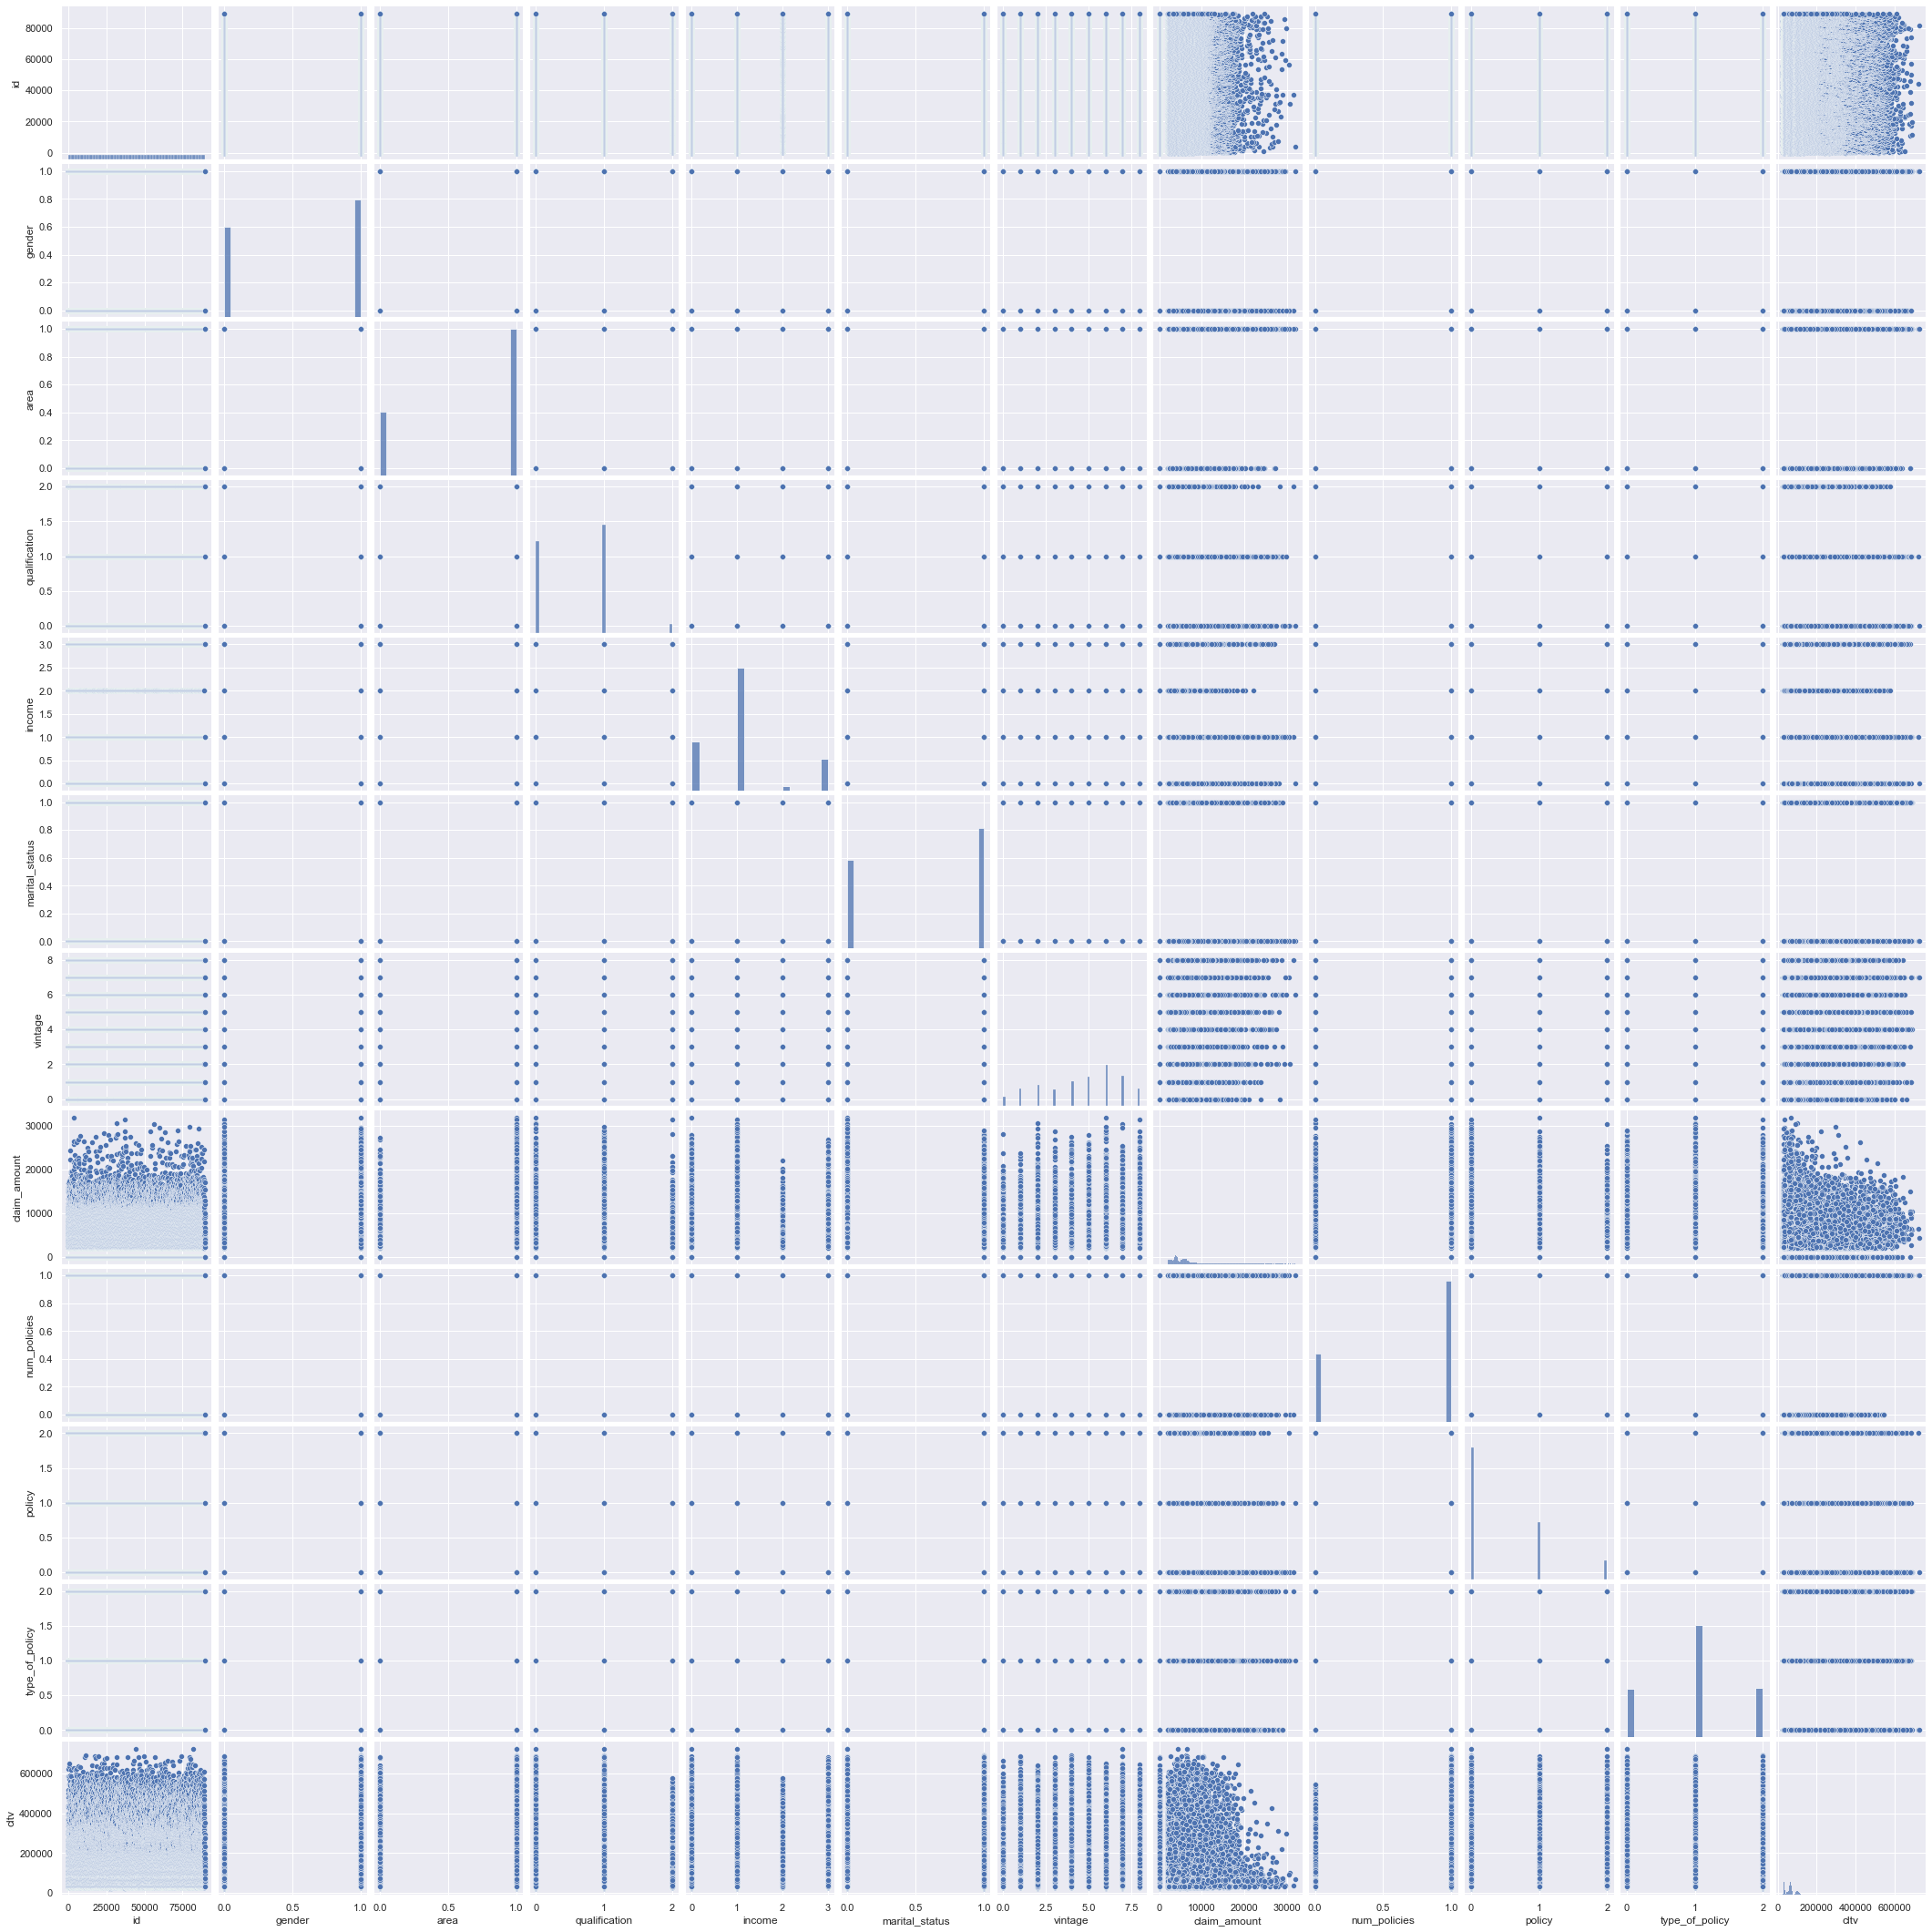

In [167]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [168]:
train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [169]:
test.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [170]:
train = train.drop(['id'],axis=1)
print('-------------'*9)
test = test.drop(['id'],axis=1)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          89392 non-null  int32
 1   area            89392 non-null  int32
 2   qualification   89392 non-null  int32
 3   income          89392 non-null  int32
 4   marital_status  89392 non-null  int64
 5   vintage         89392 non-null  int64
 6   claim_amount    89392 non-null  int64
 7   num_policies    89392 non-null  int32
 8   policy          89392 non-null  int32
 9   type_of_policy  89392 non-null  int32
 10  cltv            89392 non-null  int64
dtypes: int32(7), int64(4)
memory usage: 5.1 MB


In [172]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          59595 non-null  int32
 1   area            59595 non-null  int32
 2   qualification   59595 non-null  int32
 3   income          59595 non-null  int32
 4   marital_status  59595 non-null  int64
 5   vintage         59595 non-null  int64
 6   claim_amount    59595 non-null  int64
 7   num_policies    59595 non-null  int32
 8   policy          59595 non-null  int32
 9   type_of_policy  59595 non-null  int32
dtypes: int32(7), int64(3)
memory usage: 3.0 MB


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [173]:
train_temp,test_temp=train_test_split(train,test_size=0.15,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-"
      ,len(train_temp),"\nLength of Test Data:-",len(test_temp))

features=list(train.columns)
label='cltv'

features.remove(label)

print('-------------'*9)
print("\nFEATURES ARE:-",features)

print('-------------'*9)
print("\nLABELS ARE:-",label)

print('-------------'*9)

# To check the data points in "Train" & "Test" datasets after split
X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

Length of Original Data:- 89392 
Length of Train Data:- 75983 
Length of Test Data:- 13409
---------------------------------------------------------------------------------------------------------------------

FEATURES ARE:- ['gender', 'area', 'qualification', 'income', 'marital_status', 'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy']
---------------------------------------------------------------------------------------------------------------------

LABELS ARE:- cltv
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Cat Boost Regressor</h2>
</div>

In [174]:
model1 = CatBoostRegressor(depth = 2, iterations = 100, l2_leaf_reg = 0.2
                                 ,learning_rate = 0.03,random_state=0) 
model1.fit(X_train,y_train) 
print('Accuracy of Cat Boost Regressor on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))
print('Accuracy of Cat Boost Regressor on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)

0:	learn: 90154.7787513	total: 19.3ms	remaining: 1.91s
1:	learn: 89784.5548537	total: 31.9ms	remaining: 1.56s
2:	learn: 89440.0519383	total: 44.1ms	remaining: 1.42s
3:	learn: 89111.1217466	total: 89.1ms	remaining: 2.14s
4:	learn: 88802.2270670	total: 126ms	remaining: 2.4s
5:	learn: 88505.8174807	total: 159ms	remaining: 2.5s
6:	learn: 88226.0159136	total: 190ms	remaining: 2.52s
7:	learn: 87961.9502725	total: 207ms	remaining: 2.38s
8:	learn: 87716.7767785	total: 224ms	remaining: 2.27s
9:	learn: 87479.7414990	total: 238ms	remaining: 2.14s
10:	learn: 87257.8553364	total: 252ms	remaining: 2.04s
11:	learn: 87047.5768170	total: 265ms	remaining: 1.94s
12:	learn: 86851.0006001	total: 276ms	remaining: 1.84s
13:	learn: 86665.6347737	total: 289ms	remaining: 1.78s
14:	learn: 86489.5074363	total: 304ms	remaining: 1.73s
15:	learn: 86320.6429982	total: 324ms	remaining: 1.7s
16:	learn: 86160.9970543	total: 338ms	remaining: 1.65s
17:	learn: 86013.9614444	total: 353ms	remaining: 1.6s
18:	learn: 85875.633

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- XGB Regressor</h2>
</div>

In [175]:
model2 = XGBRegressor(n_estimators = 100, min_child_weight =  2, max_depth = 5
                            , learning_rate = 0.15, booster = 'gbtree', base_score = 1
                           , random_state=0) 
model2.fit(X_train,y_train) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of XGB Regressor on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)

Accuracy of XGB Regressor on training set: 0.19
Accuracy of XGB Regressor on test set: 0.16
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Light Gradient Boosted Machine(LGBM) Regressor</h2>
</div>

In [176]:
model3 = LGBMRegressor(colsample_bytree=0.7, learning_rate=0.04444206059437656
                             ,random_state=49) 
model3.fit(X_train,y_train) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))
print('Accuracy of LGBM Regressor on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)

Accuracy of LGBM Regressor on training set: 0.17
Accuracy of LGBM Regressor on test set: 0.16
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Gradient Boosting Regressor</h2>
</div>

In [177]:
model4 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.015,
                          max_depth=8, max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.001, min_samples_leaf=5,
                          min_samples_split=7, min_weight_fraction_leaf=0.0,
                          n_estimators=260, n_iter_no_change=None,
                          random_state=2, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 
model4.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of Gradient Boosting Regressor on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Gradient Boosting Regressor on training set: 0.19
Accuracy of Gradient Boosting Regressor on test set: 0.16
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Histogram Gradient Boosting Regression</h2>
</div>

In [178]:
model5 = HistGradientBoostingRegressor(learning_rate = 0.11058510725696458
                                        , max_leaf_nodes = 5
                                        ,random_state = 42) 
model5.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(model5.score(X_train, y_train)))

print('Accuracy of Hist Gradient Boosting Regressor on test set: {:.2f}'
     .format(model5.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Hist Gradient Boosting Regressor on training set: 0.16
Accuracy of Hist Gradient Boosting Regressor on test set: 0.16
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Multi Layer Perceptron Regression</h2>
</div>

In [179]:
model6 = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 1000,activation = 'relu',
                       solver = 'adam')
model6.fit(X_train,y_train) 

print('Accuracy of Multi Layer Perceptron Regressor on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))
print('Accuracy of Multi Layer Perceptron Regressor on test set: {:.2f}'
     .format(model6.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Multi Layer Perceptron Regressor on training set: 0.15
Accuracy of Multi Layer Perceptron Regressor on test set: 0.15
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [180]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 1
y_pred1 = model1.predict(x) #R^2 Score = 0.15207333799300904
# Prediction using Model 2
y_pred2 = model2.predict(x) #R^2 Score = 0.15482957030474975 
# Prediction using Model 3
y_pred3 = model3.predict(x) #R^2 Score = 0.1594171426716251
# Prediction using Model 4
y_pred4 = model4.predict(x) #R^2 Score = 0.15718220360282742
# Prediction using Model 5
y_pred5 = model5.predict(x) #R^2 Score = 0.15648403909703212
# Prediction using Model 6
y_pred6 = model6.predict(x) #R^2 Score = 0.14221485528191902

# Final Prediction using Ensemble Technique
y_pred_A = (0.9*y_pred3 + 0.1*y_pred4) #R^2 Score = 0.15938490985082243
y_pred_B = (0.9*y_pred_A + 0.1*y_pred6) #R^2 Score = 0.15893762309767834
y_pred = (0.99*y_pred_A + 0.01*y_pred_B) #R^2 Score = 0.15938322870390498
print("Result of Ensemble Technique used for Submission")

Result of Ensemble Technique used for Submission


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [181]:
df1=pd.DataFrame(y_pred,columns=['cltv'])
submission1 = submission.drop(['cltv'], axis=1)

final_pred = pd.concat([submission1,df1], axis=1) 
final_pred.to_csv(r'C:\Users\PC\Pictures\AV\JTHON-JAN23\Final_Submission_Aniiket_Barphe.csv',index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission R^2 Score:**

**1) Private Leaderboard :-** 0.1600135587 

**2) Public Leaderboard :-** 0.1594171427

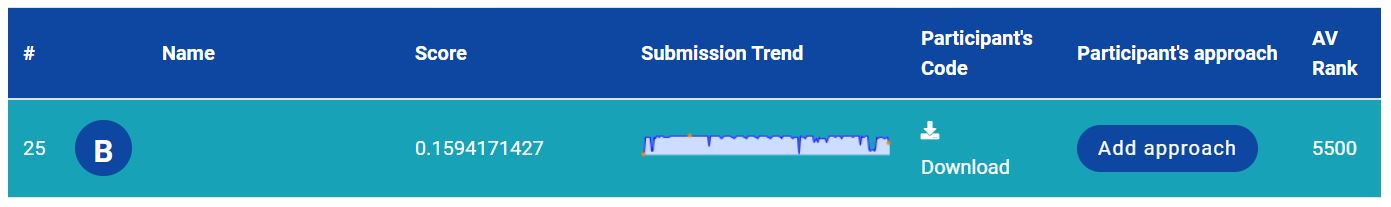

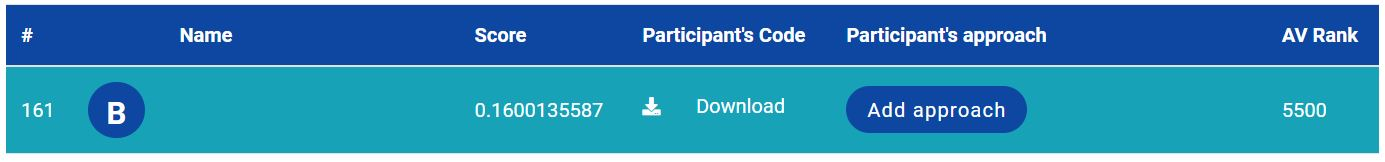

**Competition Link:-** https://datahack.analyticsvidhya.com/contest/job-a-thon-january-2023/#LeaderBoard

**Rank Scored:-**

a) **25** out of **7416** registered participants (Public Leaderboard)

b) **161** out of **7416** registered participants (Private Leaderboard)